In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

### Reading csv File ###

In [2]:
df = pd.read_csv("Chennai houseing sale.csv")

### Lets View What is in the Data ###

In [3]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


### A Quick Information about the Data ###

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### Size Of the Data

In [5]:
df.shape

(7109, 22)

### Checking for null values

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Replacing the null values with mean values of the data using simple imputer

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean' , fill_value = None) 
df['N_BEDROOM'] = imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM'] = imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL'] = imputer.fit_transform(df[['QS_OVERALL']])

In [8]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Lets see the Unique values of columns

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


### Cleaning the data

In [10]:
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace = True)
df.AREA.replace('Karapakkam','Karapakam',inplace = True)
df.AREA.replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace = True)
df.AREA.replace('KKNagar','KK Nagar',inplace = True)
df.AREA.replace('TNagar','T Nagar',inplace = True)
df.AREA.replace('Adyr','Adyar',inplace = True)
df.AREA.replace('Velchery','Velachery',inplace = True)
df.BUILDTYPE.replace('Comercial','Commercial',inplace = True)
df.BUILDTYPE.replace('Other','Others',inplace = True)
df.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace = True)
df.UTILITY_AVAIL.replace('AllPub','All Pub',inplace = True)
df.SALE_COND.replace('Ab Normal','AbNormal',inplace = True)
df.SALE_COND.replace(['Partiall','PartiaLl'],'Partial',inplace = True)
df.SALE_COND.replace('Adj Land','AdjLand',inplace = True)
df.PARK_FACIL.replace('Noo','No',inplace = True)
df.STREET.replace('Pavd','Paved',inplace = True)
df.STREET.replace('NoAccess','No Access',inplace = True)

### Changing the datatype from float to int

In [11]:
df.QS_ROOMS = df.QS_ROOMS.astype(int)
df.QS_BATHROOM = df.QS_BATHROOM.astype(int)
df.QS_BEDROOM = df.QS_BEDROOM.astype(int)
df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BATHROOM = df.N_BATHROOM.astype(int)

### statistical description of data

In [12]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.075538,3.069349,3.056126,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.872937,0.876024,0.871499,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


### count of area

In [13]:
df.AREA.value_counts()

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### count of houses in different area in channai

In [15]:
px.pie(df.groupby('AREA',as_index=False)['PRT_ID'].count(),values='PRT_ID',names='AREA',labels={'PRT_ID':'Count'},color_discrete_sequence=px.colors.sequential.Plasma,hole=.5,title='<b> Houses Count in different Areas of Chennai</b>')

1. chrompet area has maximum houses when compared to others
2. T nagar area has less houses in channai

### how the sales prices of houses varies with different areas in channai

In [16]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',title='<b> sales price of houses in different areas</b>')

1. T nagar and anna nagar area houses has maximum sales price and kk nagar area houses are second max sales price
2. karapakam area houses has less sales prices when compared to other area houses

### how the square foot of the house will effect the sales price

In [18]:
px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT'},template='plotly_dark',title='<b>SQFT versus SALES PRICES of houses in different areas </b>')

1. Increase in square foot of house increase the sales price of houses
2. as we can see the houses related to same area having almost similar square feet length

### how the sales price depends on number of rooms

In [20]:
px.box(df,x='N_ROOM',y='SALES_PRICE',color='AREA',title='<b>TOTAL ROOMS versus SALES PRICE of houses in different areas</b>')

as we can see increase in rooms count increase the price of house

### correlation

In [21]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.016146,-0.011463,0.005847,0.013989,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.013050,-0.021857,0.002757,-0.017255,0.011600,0.010994,0.018783
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.011434,-0.008603,0.014449,0.014245,0.455380,0.430446,0.330987
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.010452,-0.011005,0.013390,0.007961,0.260244,0.256726,0.108834
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.013468,-0.009066,0.012072,0.015418,0.630932,0.533343,0.602760
QS_ROOMS,0.016146,0.013050,0.011434,0.010452,0.013468,1.000000,0.001796,0.009590,0.489271,0.014614,0.007072,0.016059
QS_BATHROOM,-0.011463,-0.021857,-0.008603,-0.011005,-0.009066,0.001796,1.000000,-0.011917,0.513585,-0.014777,-0.008397,-0.019469
QS_BEDROOM,0.005847,0.002757,0.014449,0.013390,0.012072,0.009590,-0.011917,1.000000,0.598154,0.018875,0.019376,0.015044
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.489271,0.513585,0.598154,1.000000,0.022410,0.016946,0.020485
REG_FEE,0.657544,0.011600,0.455380,0.260244,0.630932,0.014614,-0.014777,0.018875,0.022410,1.000000,0.659903,0.878148


### pairwise correlation of all columns in the data

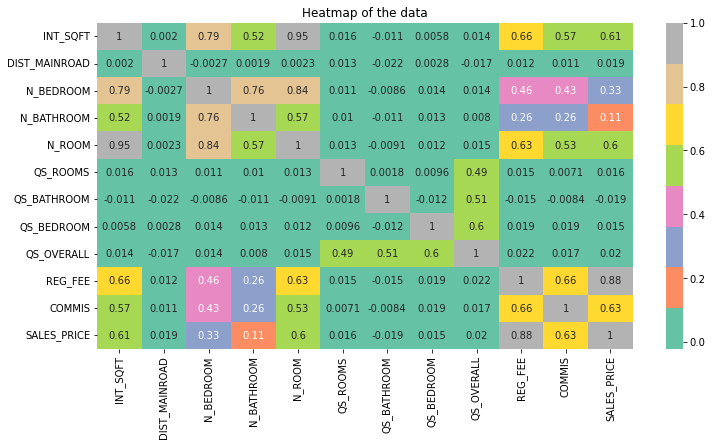

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2')
plt.title('Heatmap of the data')
plt.show()